In [1]:
import h5py
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from scipy.ndimage import rotate
import pandas as pd
from moseq2_detectron_extract.io.annot import read_annotations

In [5]:
def bbox_from_mask(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return rmin, rmax, cmin, cmax

def bbox_aspect(bbox):
    ''' Return the apsect ratio of a bounding box.
    Bounding Box Format: (min_x, max_x, min_y, max_y)
    
    '''
    return (bbox[3] - bbox[2]) / (bbox[1] - bbox[0])

In [3]:
h5 = h5py.File(r"F:\moseq\WWC1_W88C\2020-08-18_modeling\_aggregate_results\2019-11-08_11-07-08_191108-wwc1-w88_c-m-coh190830_190830-wwc1-w88_c-m-1_results_00.h5", 'r')

# Check aspect ratios based on mask generated by moseq2-extract (tail-filtered)

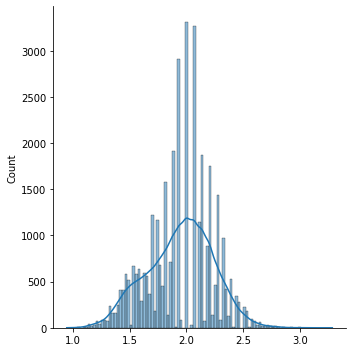

In [4]:
mask_aspects = []
for mask in h5['/frames_mask'][()]:
    try:
        mask_aspects.append(bbox_aspect(bbox_from_mask(mask)))
    except:
        pass
sns.displot(mask_aspects, kde=True)

# Check aspect ratios based on mask generated by moseq2-extract (tail-filtered), but taking into account rotation

c:\users\josh\anaconda3\envs\moseq-detectron2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in remainder
  """


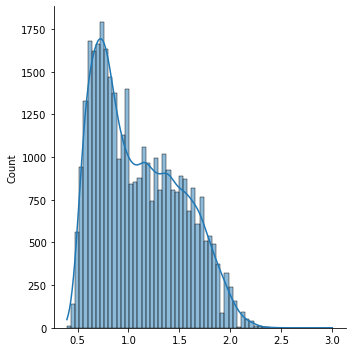

In [5]:
rotated_mask_aspects = []
for mask, angle in zip(h5['/frames_mask'][()], h5['/scalars/angle'][()]):
    try:
        angle = np.rad2deg(angle)
        angle = angle % 360
        if angle < 0:
            angle += 360
        rotated = rotate(mask.astype('float'), angle, prefilter=False)
        rotated[rotated > 0] = 1
        rotated_mask_aspects.append(bbox_aspect(bbox_from_mask(rotated)))
    except:
        pass
sns.displot(rotated_mask_aspects, kde=True)

# Check aspect ratios based on scalar data collected by moseq2-extract (compare width vs length)

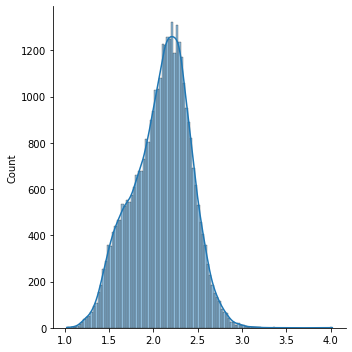

In [6]:
scalar_aspects = []
for length, width in zip(h5['/scalars/length_px'][()], h5['/scalars/width_px'][()]):
    try:
        scalar_aspects.append(length / width)
    except:
        pass
sns.displot(scalar_aspects, kde=True)

# Check aspect ratios based on keypoints collected by moseq2-detectron-extract (rough)

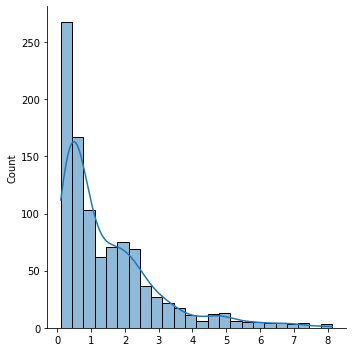

In [16]:
kpdf = pd.read_csv(r"E:\moseq_raw_data\detectron2_testing\session_20200806170816\images\keypoints.tsv", sep='\t')
xs = np.vstack((kpdf['Nose_X'], kpdf['Left Ear_X'], kpdf['Right Ear_X'], kpdf['Neck_X'], kpdf['Left Hip_X'], kpdf['Right Hip_X'], kpdf['TailBase_X'], kpdf['TailTip_X']))
ys = np.vstack((kpdf['Nose_Y'], kpdf['Left Ear_Y'], kpdf['Right Ear_Y'], kpdf['Neck_Y'], kpdf['Left Hip_Y'], kpdf['Right Hip_Y'], kpdf['TailBase_Y'], kpdf['TailTip_Y']))
bba = (np.nanmax(ys, axis=0) - np.nanmin(ys, axis=0)) / (np.nanmax(xs, axis=0) - np.nanmin(xs, axis=0))
sns.displot(bba, kde=True)

In [15]:
ys[ys == 0]

array([], dtype=float64)

In [10]:
kpdf

,Frame_Idx,Nose_X,Nose_Y,Nose_S,Left Ear_X,Left Ear_Y,Left Ear_S,Right Ear_X,Right Ear_Y,Right Ear_S,...,Left Hip_S,Right Hip_X,Right Hip_Y,Right Hip_S,TailBase_X,TailBase_Y,TailBase_S,TailTip_X,TailTip_Y,TailTip_S
0,0,91.804543,169.219742,0.225980,96.799507,161.233734,0.455791,86.809570,158.238983,2.208552,...,1869.737183,90.805550,127.293213,44.054443,100.795486,121.303711,0.058399,136.759247,102.336945,1.159329
1,1,91.804520,169.219727,0.226040,96.799484,161.233734,0.455890,86.809555,158.238983,2.208350,...,1869.581543,90.805527,127.293213,44.060841,100.795456,121.303711,0.058375,136.759201,102.336960,1.159328
2,2,91.014641,171.016953,2.063751,97.014374,164.108383,0.075835,88.014778,162.134506,0.398289,...,0.302992,90.014687,129.565536,317.828278,99.014282,122.656967,62.259720,136.012604,103.905136,0.508661
3,3,90.448097,173.931152,0.681989,97.349457,164.938049,26.594080,87.490372,163.938812,9.452398,...,65.794456,90.448097,131.963303,0.103645,98.335373,124.968658,2.868024,134.813995,99.987793,1.095916
4,4,91.286331,175.972198,1.155935,98.201736,167.046295,1.471692,88.322594,166.054520,32.584187,...,1225.962769,90.298424,134.317963,10.588628,98.201736,126.383835,4.103082,131.790833,100.597885,1.362341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,989,224.684509,105.563713,0.057595,206.126709,73.975227,0.533028,219.800873,71.013809,0.876611,...,26.198769,225.661224,96.679451,1.155172,223.707779,105.563713,54.264706,202.219818,117.409393,1.160629
990,990,225.077728,106.228683,3.173634,206.308258,75.403702,0.461032,218.162659,99.268204,53.482586,...,26.739130,207.296127,74.409348,37516.109375,211.247589,63.471455,4.658319,184.575211,28.669064,0.922691
991,991,224.865128,106.263290,8.657918,206.077881,75.643250,34.906425,216.954712,98.361343,2.796621,...,4.671389,207.066681,75.643250,10.732583,213.988312,63.790325,13.545265,184.324234,32.182533,0.501553
992,992,223.433258,107.496140,4.716564,205.882233,75.686745,0.053009,219.533035,70.716530,0.500284,...,79.160324,226.358429,97.555695,0.135642,223.433258,106.502090,1.995442,223.433258,107.496140,0.032107


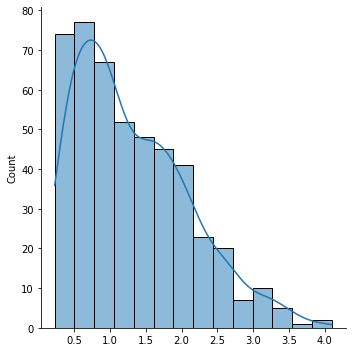

In [6]:
annot_aspects = []
for a in read_annotations("E:\\moseq_raw_data\\unet_testing\\mask_keypoints_for_michael\\result.json"):
    bb = a['annotations'][0]['bbox']
    annot_aspects.append(bbox_aspect([bb[0], bb[2], bb[1], bb[3]]))
sns.displot(annot_aspects, kde=True)